<h1 style="text-align:center; font-size:350%; color:#00008B;"><b>Credit Card Fraud Detection</b></h1>

## Problem Statement: 
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine learning models.
We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

## Data Understanding :

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

<h2 style="font-size:150%;"><b>Importing Libraries:</b></h2>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<h2 style="font-size:150%;"><b>Setting options:</b></h2>

In [2]:
pd.options.display.max_columns = None   # displaying all columns
pd.options.display.max_rows = None      # displaying all rows 
np.set_printoptions(suppress=True)      #converting the 'exponential' values to float

<h2 style="font-size:150%;"><b>Reading Data:</b></h2>

In [3]:
df=pd.read_csv(r"C:\Users\sm983\Desktop\Imarticus full clear\Github\Credit card_detection_project\Project Code\data\creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h2 style="font-size:150%;"><b>Checking the shape:</b></h2>

In [4]:
df.shape

(284807, 31)

<h2 style="font-size:150%;"><b>Checking data types and null/non-null distributions:</b></h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h2 style="font-size:150%;"><b>Checking distribution of numerical values:</b></h2>

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h2 style="font-size:150%;"><b>Checking the class distribution of the target variable:</b></h2>

In [7]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<h2 style="font-size:150%;"><b>Checking the class distribution of the target variable in percentage:</b></h2>

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

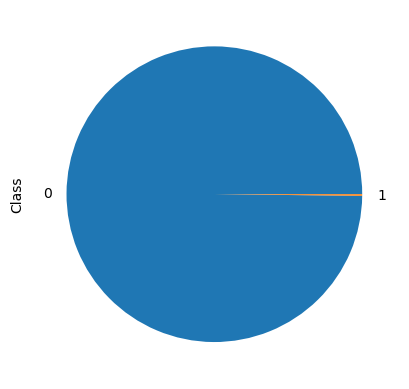

In [8]:
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)
((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie()

<h2 style="font-size:150%;"><b>Checking the Correlation:</b></h2>

In [9]:
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

<h2 style="font-size:150%;"><b>Checking the correlation in heatmap:</b></h2>

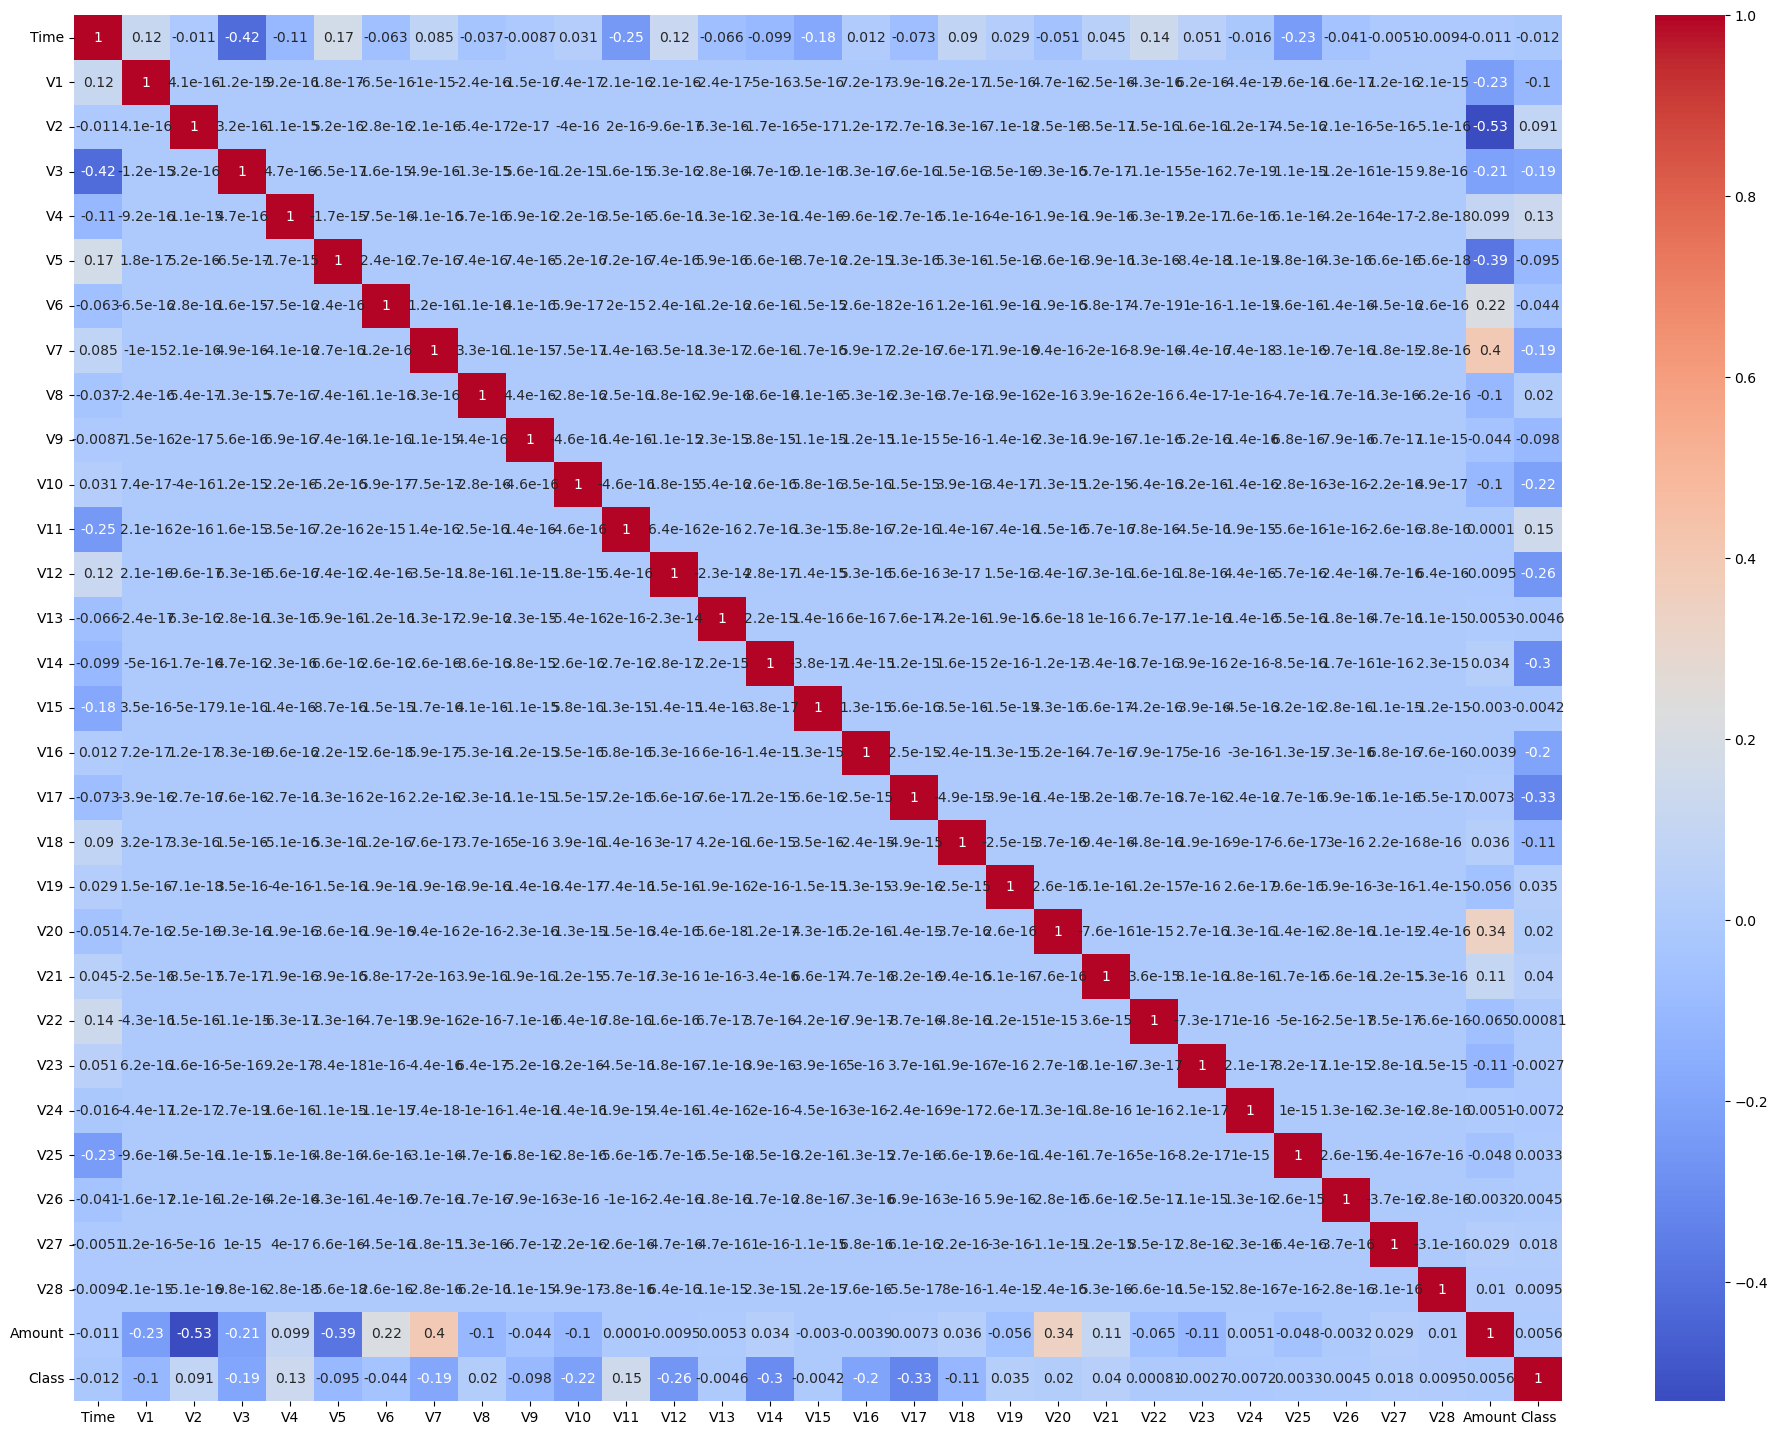

In [11]:
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

<h2 style="font-size:150%;"><b>Checking the % distribution of normal vs fraud:</b></h2>

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


<h2 style="font-size:150%;"><b>Feature Engineering:</b></h2>

In [13]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [14]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

<h2 style="font-size:150%;"><b>Splitting the data into train and test data:</b></h2>

In [15]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [16]:
# Checking some rows of X
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
X_scaled = scaler.fit_transform(X)

# If you want to convert it back to a DataFrame with the original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [18]:
# Checking some rows of y
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

<h2 style="font-size:150%;"><b># Splitting the dataset using train test split:</b></h2>

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=100, test_size=0.20)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 201788 to 56088
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         227845 non-null  float64
 1   V2         227845 non-null  float64
 2   V3         227845 non-null  float64
 3   V4         227845 non-null  float64
 4   V5         227845 non-null  float64
 5   V6         227845 non-null  float64
 6   V7         227845 non-null  float64
 7   V8         227845 non-null  float64
 8   V9         227845 non-null  float64
 9   V10        227845 non-null  float64
 10  V11        227845 non-null  float64
 11  V12        227845 non-null  float64
 12  V13        227845 non-null  float64
 13  V14        227845 non-null  float64
 14  V15        227845 non-null  float64
 15  V16        227845 non-null  float64
 16  V17        227845 non-null  float64
 17  V18        227845 non-null  float64
 18  V19        227845 non-null  float64
 19  V20        227845 non-nu

In [21]:
x_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
201788,1.033207,-0.259927,-0.455769,-0.142288,-0.117723,0.212958,-0.545388,0.160949,1.023383,-0.034682,0.302386,0.875764,-0.009607,0.121050,0.094543,0.717074,-1.174881,0.575712,0.707678,-0.222317,-0.265760,-0.658416,0.545292,0.097704,-0.826844,-0.615953,-0.000156,-0.142229,-0.350151,-0.179318
179369,-0.074175,0.446153,0.358269,0.630471,0.254191,0.066994,0.506598,-0.041142,-0.666800,0.273401,0.508495,0.041308,-0.694064,0.675073,0.575029,-1.253702,0.602517,0.291090,4.114804,0.268131,-0.169210,-0.363180,-0.177061,-0.716961,-0.976593,1.492628,-0.015750,0.442473,-0.208739,-0.693382
73138,-1.539724,-1.163083,0.810930,0.509636,0.789656,-0.146912,-0.373930,0.769741,-0.557233,-0.887358,1.084081,1.027243,-0.476482,0.669197,-0.470531,-0.720407,0.747211,-0.856697,-0.049050,1.093283,0.374272,-0.440334,0.340921,-0.443811,0.462690,0.660364,-0.249549,-1.106561,0.366226,0.163392
208679,0.945518,-0.610090,-0.989125,-0.155926,-0.411794,-0.925213,0.200933,-0.451696,-0.740347,0.721342,-0.768402,0.674166,1.435053,0.045834,-0.338143,-2.060742,-0.014268,0.449901,-0.808748,-0.254955,-0.553723,-1.238915,0.219982,0.125312,-0.468132,0.944821,-0.233049,-0.095395,0.370664,-0.007963
206534,1.142519,-0.333986,-0.940816,-0.652865,-0.291060,-1.079536,-0.096955,-0.376156,-0.652865,0.782173,-0.487537,-0.445839,0.326116,0.130966,0.291253,0.915992,0.265280,-2.225662,0.763942,-0.058912,0.068680,0.173076,0.345149,-0.132892,-0.122728,-0.636995,-0.106131,-0.193503,-0.320445,-0.179318


In [22]:
x_test.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
49089,0.627690,-0.142601,-0.413629,0.296551,1.301954,3.054619,-0.724460,0.867503,0.679019,-0.135284,-0.833202,0.398164,-0.261083,-0.289033,-0.837755,-0.229324,-0.398102,0.007197,0.586496,-0.075133,-0.231524,-0.397892,-0.208612,1.693951,1.626754,-0.562964,0.148778,0.054848,-0.345273,-0.350673
154704,1.029714,-0.053746,-1.971478,-0.100698,1.938372,2.501214,-0.527314,0.630309,1.786376,-0.941384,1.104109,-2.420030,1.256280,-0.058637,-0.804855,0.016870,2.225562,0.398192,-0.553287,-0.191483,-0.250711,-0.123552,0.139622,0.942264,0.195479,1.287450,-0.121293,-0.129759,-0.325283,-1.721511
67247,0.273189,-0.889711,0.572648,0.272245,-1.042667,0.276309,-0.403665,0.254279,0.948521,-0.401534,1.122477,0.908300,-1.100839,-0.057459,-0.679417,-0.218049,0.367331,-0.571045,0.283965,0.567740,0.038133,-0.530120,-0.205579,0.473276,-0.262241,1.895178,-0.206536,0.159006,0.870825,-0.007963
251657,1.086687,-0.070983,-0.998455,0.117565,0.260150,-0.405378,0.093787,-0.180968,0.619238,0.073451,-1.670725,-0.127681,-0.208933,0.321177,0.233243,0.186057,-0.691162,-0.669660,0.580644,-0.294812,-0.487382,-1.247189,0.357868,-1.775964,-0.361647,0.555077,-0.177720,-0.218849,-0.349271,0.848811
201903,0.285187,0.961608,-1.562251,3.619278,1.573481,-0.375614,0.856710,-0.212863,-1.783185,0.871485,-0.282322,-1.008454,0.472550,-2.891633,0.242494,0.404374,3.064971,1.303518,0.820703,0.323582,-0.047716,0.374059,0.611098,0.548177,-0.642187,0.930871,0.417671,0.015010,-0.232207,-0.179318


<h2 style="font-size:100%;"><b>Adding Intercept to Training Features for Logistic Regression:</b></h2>

In [23]:
x_train=sm.add_constant(x_train)
x_train.head()

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
201788,1.0,1.033207,-0.259927,-0.455769,-0.142288,-0.117723,0.212958,-0.545388,0.160949,1.023383,-0.034682,0.302386,0.875764,-0.009607,0.121050,0.094543,0.717074,-1.174881,0.575712,0.707678,-0.222317,-0.265760,-0.658416,0.545292,0.097704,-0.826844,-0.615953,-0.000156,-0.142229,-0.350151,-0.179318
179369,1.0,-0.074175,0.446153,0.358269,0.630471,0.254191,0.066994,0.506598,-0.041142,-0.666800,0.273401,0.508495,0.041308,-0.694064,0.675073,0.575029,-1.253702,0.602517,0.291090,4.114804,0.268131,-0.169210,-0.363180,-0.177061,-0.716961,-0.976593,1.492628,-0.015750,0.442473,-0.208739,-0.693382
73138,1.0,-1.539724,-1.163083,0.810930,0.509636,0.789656,-0.146912,-0.373930,0.769741,-0.557233,-0.887358,1.084081,1.027243,-0.476482,0.669197,-0.470531,-0.720407,0.747211,-0.856697,-0.049050,1.093283,0.374272,-0.440334,0.340921,-0.443811,0.462690,0.660364,-0.249549,-1.106561,0.366226,0.163392
208679,1.0,0.945518,-0.610090,-0.989125,-0.155926,-0.411794,-0.925213,0.200933,-0.451696,-0.740347,0.721342,-0.768402,0.674166,1.435053,0.045834,-0.338143,-2.060742,-0.014268,0.449901,-0.808748,-0.254955,-0.553723,-1.238915,0.219982,0.125312,-0.468132,0.944821,-0.233049,-0.095395,0.370664,-0.007963
206534,1.0,1.142519,-0.333986,-0.940816,-0.652865,-0.291060,-1.079536,-0.096955,-0.376156,-0.652865,0.782173,-0.487537,-0.445839,0.326116,0.130966,0.291253,0.915992,0.265280,-2.225662,0.763942,-0.058912,0.068680,0.173076,0.345149,-0.132892,-0.122728,-0.636995,-0.106131,-0.193503,-0.320445,-0.179318


<h2 style="font-size:100%;"><b>Fitting Logistic Regression Model and Summarizing Results:</b></h2>

In [24]:
from sklearn.linear_model import LogisticRegression
logistic=sm.Logit(y_train,x_train).fit()
print(logistic.summary())

Optimization terminated successfully.
         Current function value: 0.003650
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               227845
Model:                          Logit   Df Residuals:                   227814
Method:                           MLE   Df Model:                           30
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.7144
Time:                        14:02:52   Log-Likelihood:                -831.67
converged:                       True   LL-Null:                       -2912.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6831      0.160    -54.364      0.000      -8.996      -8.370
V1             0.3201      0

<h2 style="font-size:100%;"><b>Adding Intercept to Test Features for Logistic Regression:</b></h2>

In [25]:
x_test=sm.add_constant(x_test)
x_test.head()

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
49089,1.0,0.627690,-0.142601,-0.413629,0.296551,1.301954,3.054619,-0.724460,0.867503,0.679019,-0.135284,-0.833202,0.398164,-0.261083,-0.289033,-0.837755,-0.229324,-0.398102,0.007197,0.586496,-0.075133,-0.231524,-0.397892,-0.208612,1.693951,1.626754,-0.562964,0.148778,0.054848,-0.345273,-0.350673
154704,1.0,1.029714,-0.053746,-1.971478,-0.100698,1.938372,2.501214,-0.527314,0.630309,1.786376,-0.941384,1.104109,-2.420030,1.256280,-0.058637,-0.804855,0.016870,2.225562,0.398192,-0.553287,-0.191483,-0.250711,-0.123552,0.139622,0.942264,0.195479,1.287450,-0.121293,-0.129759,-0.325283,-1.721511
67247,1.0,0.273189,-0.889711,0.572648,0.272245,-1.042667,0.276309,-0.403665,0.254279,0.948521,-0.401534,1.122477,0.908300,-1.100839,-0.057459,-0.679417,-0.218049,0.367331,-0.571045,0.283965,0.567740,0.038133,-0.530120,-0.205579,0.473276,-0.262241,1.895178,-0.206536,0.159006,0.870825,-0.007963
251657,1.0,1.086687,-0.070983,-0.998455,0.117565,0.260150,-0.405378,0.093787,-0.180968,0.619238,0.073451,-1.670725,-0.127681,-0.208933,0.321177,0.233243,0.186057,-0.691162,-0.669660,0.580644,-0.294812,-0.487382,-1.247189,0.357868,-1.775964,-0.361647,0.555077,-0.177720,-0.218849,-0.349271,0.848811
201903,1.0,0.285187,0.961608,-1.562251,3.619278,1.573481,-0.375614,0.856710,-0.212863,-1.783185,0.871485,-0.282322,-1.008454,0.472550,-2.891633,0.242494,0.404374,3.064971,1.303518,0.820703,0.323582,-0.047716,0.374059,0.611098,0.548177,-0.642187,0.930871,0.417671,0.015010,-0.232207,-0.179318


<h2 style="font-size:100%;"><b>Predicted Probabilities using Logistic Regression Model:</b></h2>

In [26]:
y_pred_pro=logistic.predict(x_test)
y_pred_pro.head()

49089     0.000206
154704    0.000072
67247     0.000286
251657    0.000138
201903    0.018438
dtype: float64

<h2 style="font-size:100%;"><b>Predicting Binary Classes based on Threshold:</b></h2>

In [27]:
y_pred=['0' if x < 0.5 else '1' for x in y_pred_pro]

<h2 style="font-size:100%;"><b>Converting Predicted Binary classes to Float32 and Displaying First 5 Elements:</b></h2>

In [28]:
y_pred=np.array(y_pred,dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

<h3 style="font-size:150%;"><b>Utilizing Scikit-Learn for Classification Performance Metrics:</b></h3>

<h2 style="font-size:100%;"><b>Importing Libraries for Classification Performance Metrics:</b></h2>

In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap

<h2 style="font-size:120%;"><b>Developing User-Defined Functions for Classification Performance Metrics Retrieval:</b></h2>

<h2 style="font-size:100%;"><b>User-Defined Function to generate a classification report:</b></h2>

In [41]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Kappa Value:</b></h2>

In [42]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Confusion Matrix:</b></h2>

In [43]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20) 
    plt.show()

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Roc_Curve:</b></h2>

In [44]:
def plot_roc(model):
    fpr, tpr, _  = roc_curve(y_test, y_pred_pro)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for term_churn Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_pro),4)))
    plt.grid(True)

<h2 style="font-size:100%;"><b>user-defined function to generate an updated scorecard of all metrics:</b></h2>

In [45]:
score_card=pd.DataFrame(columns=['Model','Auc Score','Precision Score','Recall Score','Accuracy Score',
                                 'Kappa Score','f1-score'])
def update_score_card(model_name):
    global score_card
    score_card=score_card._append({'Model':model_name,
                                  'Auc Score':roc_auc_score(y_test,y_pred_pro),
                                  'Precision Score':metrics.precision_score(y_test,y_pred),
                                  'Recall Score':metrics.recall_score(y_test,y_pred),
                                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
                                  'Kappa Score':cohen_kappa_score(y_test,y_pred),
                                  'f1-score':metrics.f1_score(y_test,y_pred)},ignore_index=True)
    return(score_card)

<h2 style="font-size:100%;"><b>Confusion Matrix for Logistic Regression:</b></h2>

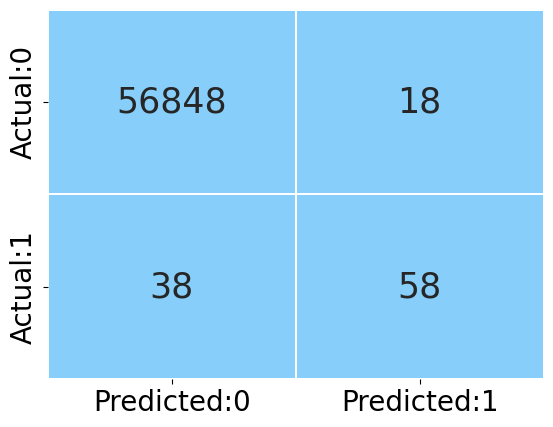

In [46]:
plot_confusion_matrix(logistic)

<h2 style="font-size:100%;"><b>Displaying Test Report for Logistic Regression Model:</b></h2>

In [47]:
test_report=get_test_report(logistic)

In [48]:
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.76      0.60      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Logistic Regression:</b></h2>

In [49]:
kappa_value=kappa_score(logistic)
print(kappa_value)

0.6739329718307672


<h2 style="font-size:100%;"><b>ROC Curve for Logistic Regression Model:</b></h2>

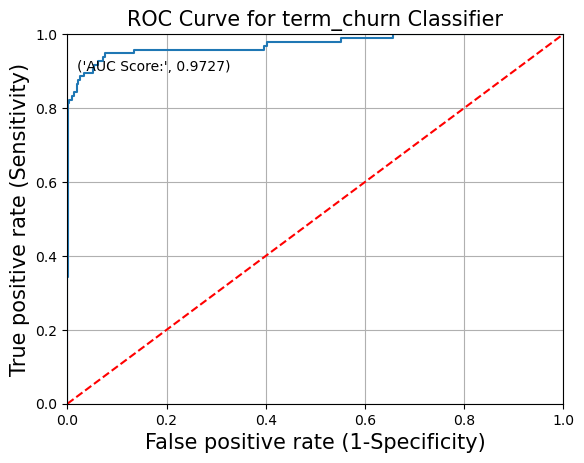

In [50]:
plot_roc(logistic)

<h2 style="font-size:100%;"><b>Generating Updated Score Card for Logistic Regression Model:</b></h2>

In [51]:
update_score_card(model_name='Logistic Regression')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.972712,0.763158,0.604167,0.999017,0.673933,0.674419


<h3 style="font-size:150%;"><b>Training Logistic Regression with Stochastic Gradient Descent(Logistic_with_SGD):</b></h3>

In [52]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(loss='log_loss',random_state=10)
log_with_SGD=SGD.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Logistic Regression with SGD:</b></h2>

In [53]:
y_pred_pro=log_with_SGD.predict_proba(x_test)[:,1]
y_pred_pro

array([0., 0., 0., ..., 0., 0., 0.])

<h2 style="font-size:100%;"><b>Predictions using Logistic Regression with SGD:</b></h2>

In [54]:
y_pred=log_with_SGD.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h2 style="font-size:150%;"><b>Performance Metrics for SGD Logistic Regression:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for SGD Logistic Regression:</b></h2>

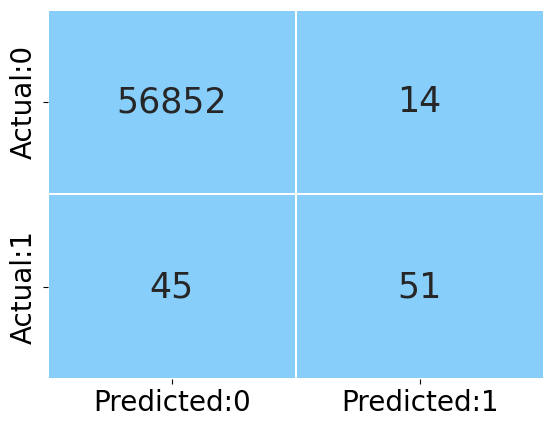

In [55]:
plot_confusion_matrix(log_with_SGD)

<h2 style="font-size:100%;"><b>Generating Test Report for SGD Logistic Regression:</b></h2>

In [56]:
test_report=get_test_report(log_with_SGD)

In [57]:
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.53      0.63        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



<h2 style="font-size:100%;"><b>Calculating kappa Value for SGD Logistic Regression:</b></h2>

In [58]:
kappa_value=kappa_score(log_with_SGD)
print(kappa_value)

0.6330410043149448


<h2 style="font-size:100%;"><b>ROC Curve for SGD Logistic Regression:</b></h2>

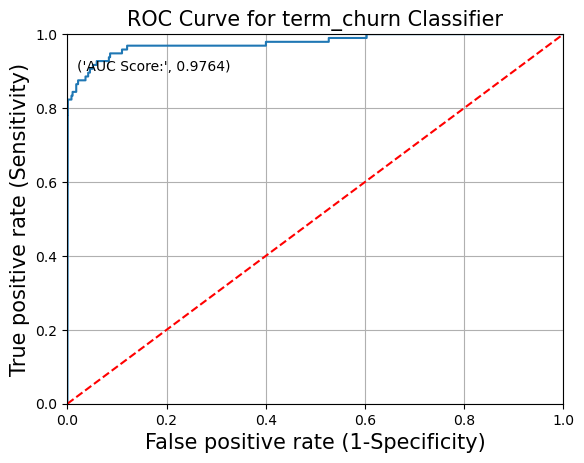

In [59]:
plot_roc(log_with_SGD)

<h2 style="font-size:100%;"><b>Updating Score Card for Logistic Regression with SGD:</b></h2>

In [60]:
update_score_card(model_name='Logistic Regression with SGD')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.972712,0.763158,0.604167,0.999017,0.673933,0.674419
1,Logistic Regression with SGD,0.976400,0.784615,0.531250,0.998964,0.633041,0.633540


<h2 style="font-size:100%;"><b>Exporting  Predictions to excel:</b></h2>

In [61]:
# Creating a DataFrame with automated serial numbers and fraud class
predict = pd.DataFrame({
    'Serial Number': range(1, len(y_pred) + 1),  # Automated row numbers
    'Fraud_class': y_pred,
    'Fraud Detected': ['Yes' if pred == 1 else 'No' for pred in y_pred]  # Yes for fraud (1), No for non-fraud (0)
})

# Exporting to Excel with the specified path
predict.to_excel(r"C:\Users\sm983\Desktop\Imarticus full clear\Github\Credit card_detection_project\Project Code\test_data\data_pred.xlsx", index=False)


## Conclusion for the Credit Card Fraud Detection Project:
In this credit card fraud detection project, Logistic Regression and Logistic Regression with Stochastic Gradient Descent (SGD) were used due to the large dataset size. The results show that both models performed well, with high AUC scores (0.97+), indicating strong discrimination between fraudulent and non-fraudulent transactions.

Logistic Regression delivered a balanced performance with a precision of 76% and a recall of 60%, achieving an overall accuracy of 99.9%.
Logistic Regression with SGD provided a slightly higher precision (78%) but at a lower recall (53%), with similar accuracy.
Given the high precision and accuracy, these models effectively reduce false positives and correctly identify frauds, making them suitable for real-world application. Due to time constraints and the satisfactory results, more complex models like Random Forest were not employed.

The project demonstrates the capability of simple yet powerful models in addressing large-scale fraud detection, balancing both precision and recall to minimize risks effectively.
